# Marketing Analytics

#### Step 1: Data Collection and Cleaning

I will be analyzing a dataset from an x company that hols customer information so they will be able to draw insights to make a better targeting compaign. this dataset was provided by kaggle under licence CC0: Public Domain.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Abrah/Downloads/marketing_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country'], dtype=object)

some of the column names are not discriptive enough, to allow all readers to understand what the data is all about we will rename some of the columns so they will describe the data they hold in a clearer way.

In [6]:
df.rename(columns = {'ID':'Customer_ID','Kidhome':'Num_kids','Teenhome':'Num_teens','Dt_Customer':'Enrollement_Date',
                          'Recency':'Purchase_Recency','MntWines':'Amount_Wine','MntFruits':'Amount_Fruit','MntMeatProducts':
                          'Amount_Meat_Products','MntFishProducts':'Amount_Fish_Products','MntSweetProducts':
                           'Amount_Sweet_Products','MntGoldProds':'Amount_Gold_Products','AcceptedCmp3':'Accepted_Compaign3',
                          'AcceptedCmp4':'Accepted_Cmpaign4','AcceptedCmp5':'Accepted_Compaign5','AcceptedCmp1':
                           'Accepted_Compaign1','AcceptedCmp2':'Accepted_Compaign2','Response':'Last_Compaign_Response',
                    ' Income ':'Income'},inplace=True)

In [7]:
df.columns.values

array(['Customer_ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Num_kids', 'Num_teens', 'Enrollement_Date',
       'Purchase_Recency', 'Amount_Wine', 'Amount_Fruit',
       'Amount_Meat_Products', 'Amount_Fish_Products',
       'Amount_Sweet_Products', 'Amount_Gold_Products',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Accepted_Compaign3',
       'Accepted_Cmpaign4', 'Accepted_Compaign5', 'Accepted_Compaign1',
       'Accepted_Compaign2', 'Last_Compaign_Response', 'Complain',
       'Country'], dtype=object)

In [8]:
#let's take a look at th top 20 rows to get a more in depth idea about our data
df.head(20)

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Num_kids,Num_teens,Enrollement_Date,Purchase_Recency,Amount_Wine,...,NumStorePurchases,NumWebVisitsMonth,Accepted_Compaign3,Accepted_Cmpaign4,Accepted_Compaign5,Accepted_Compaign1,Accepted_Compaign2,Last_Compaign_Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


now that we have made our column names more intuitive let's see what is the size of the data we are dealing with.

In [9]:
print('columns size: ', df.columns.size)
print('row size: ', df.index.size)

columns size:  28
row size:  2240


time for some data wrangleing, first we will check wether we have duplicate data and then wether we have missing data.

In [10]:
df.duplicated().value_counts()

False    2240
dtype: int64

In [11]:
df.isnull()

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Num_kids,Num_teens,Enrollement_Date,Purchase_Recency,Amount_Wine,...,NumStorePurchases,NumWebVisitsMonth,Accepted_Compaign3,Accepted_Cmpaign4,Accepted_Compaign5,Accepted_Compaign1,Accepted_Compaign2,Last_Compaign_Response,Complain,Country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Step 2: Exploratory Data Analysis

In [12]:
#get some statistics about our data
df.describe()

,Customer_ID,Year_Birth,Num_kids,Num_teens,Purchase_Recency,Amount_Wine,Amount_Fruit,Amount_Meat_Products,Amount_Fish_Products,Amount_Sweet_Products,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Accepted_Compaign3,Accepted_Cmpaign4,Accepted_Compaign5,Accepted_Compaign1,Accepted_Compaign2,Last_Compaign_Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.dtypes

Customer_ID                int64
Year_Birth                 int64
Education                 object
Marital_Status            object
Income                    object
Num_kids                   int64
Num_teens                  int64
Enrollement_Date          object
Purchase_Recency           int64
Amount_Wine                int64
Amount_Fruit               int64
Amount_Meat_Products       int64
Amount_Fish_Products       int64
Amount_Sweet_Products      int64
Amount_Gold_Products       int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Accepted_Compaign3         int64
Accepted_Cmpaign4          int64
Accepted_Compaign5         int64
Accepted_Compaign1         int64
Accepted_Compaign2         int64
Last_Compaign_Response     int64
Complain                   int64
Country                   object
dtype: object

Text(0.5, 1.0, 'Date of Birth Distribution')

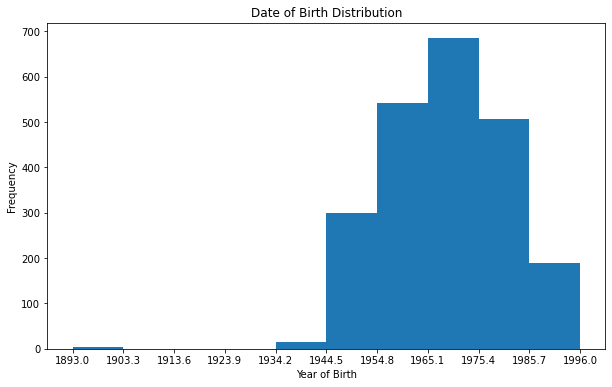

In [14]:
#customer demographics
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
freq, xticks = np.histogram(df[['Year_Birth']])
df[['Year_Birth']].plot(kind='hist', xticks=xticks, figsize=(10,6), legend=False)
plt.xlabel('Year of Birth')
plt.title('Date of Birth Distribution')

we see that most of the customers are within the age of 45 and 70.

Text(0.5, 1.0, 'Education Distribution')

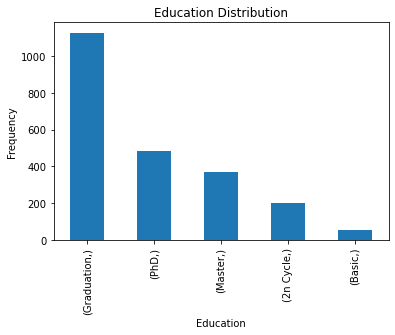

In [15]:
ed_df = df[['Education']].value_counts().to_frame()
ed_df.plot(kind='bar', legend=False)
plt.ylabel('Frequency')
plt.title('Education Distribution')

Text(0, 0.5, 'Frequency')

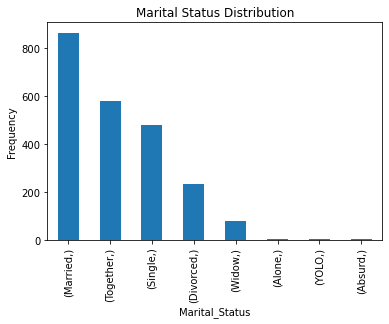

In [16]:
df[['Marital_Status']].value_counts().to_frame().plot(kind='bar', legend=False)
plt.title('Marital Status Distribution')
plt.ylabel('Frequency')

as we can see most consumers are either married or in a relationship but some marital status are not conventional such as alone, yolo and absurd, for these we will change their values to NaN

In [17]:
df['Marital_Status'].replace(('Alone','YOLO','Absurd'),np.NaN, inplace=True)

In [18]:
#makeing sure we only have valid marital status
df[['Marital_Status']].value_counts()

Marital_Status
Married           864
Together          580
Single            480
Divorced          232
Widow              77
dtype: int64

In [19]:
#let's visualize income distribution but first we have to convert the column from object to float and check wether we have any 
#empty values
df[['Income']].isnull().value_counts()

Income
False     2216
True        24
dtype: int64

In [20]:
df.dropna(subset=['Income'],inplace=True, axis=0)
df[['Income']].isnull().value_counts()

Income
False     2216
dtype: int64

In [21]:
income_df = df.Income.replace('[$,]','',regex=True)
income_df = pd.DataFrame(income_df)
income_df[['Income']] = income_df[['Income']].astype('float')
income_df

,Income
0,84835.0
1,57091.0
2,67267.0
3,32474.0
4,21474.0
...,...
2235,66476.0
2236,31056.0
2237,46310.0
2238,65819.0


In [22]:
income_df.Income.dtypes

dtype('float64')

Text(0.5, 0, 'Amount of Income')

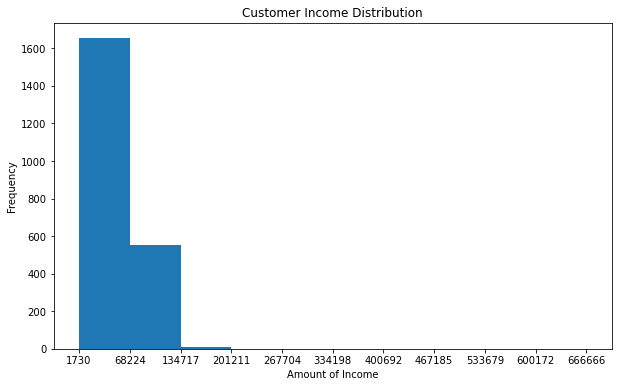

In [23]:
freq, xticks = np.histogram(income_df.Income)
income_df.Income.plot(kind='hist', xticks=xticks, figsize=(10,6))
plt.title('Customer Income Distribution')
plt.xlabel('Amount of Income')

we see that most of the customers are of income between 1730 and 68224.

Text(0, 0.5, 'Number of Customers')

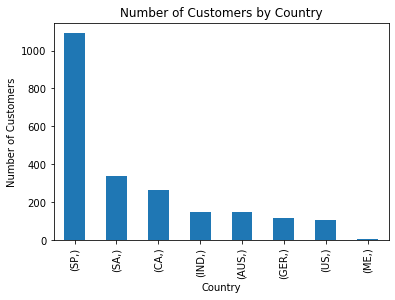

In [28]:
df[['Country']].value_counts().plot(kind='bar')
plt.title('Number of Customers by Country')
plt.ylabel('Number of Customers')

we can see that the majority of customers are from spain. now let's explore correlations exists between diffrent values and between the value of complaints and other features.

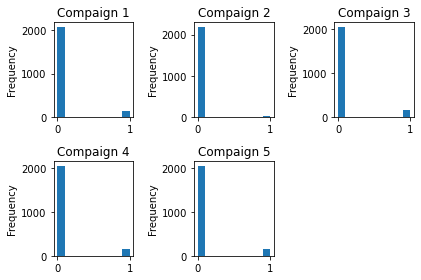

In [25]:
fig = plt.figure()
ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)
ax3 = fig.add_subplot(2,3,4)
ax4 = fig.add_subplot(2,3,5)
df['Accepted_Compaign1'].plot(kind='hist',ax=ax0)
ax0.set_title('Compaign 1')
df['Accepted_Compaign2'].plot(kind='hist',ax=ax1)
df['Accepted_Compaign3'].plot(kind='hist',ax=ax2)
df['Accepted_Cmpaign4'].plot(kind='hist',ax=ax3)
df['Accepted_Compaign5'].plot(kind='hist',ax=ax4)
ax1.set_title('Compaign 2')
ax2.set_title('Compaign 3')
ax3.set_title('Compaign 4')
ax4.set_title('Compaign 5')
fig.tight_layout()

we see that compaign 2 had a more response.

In [26]:
df.corr()

,Customer_ID,Year_Birth,Num_kids,Num_teens,Purchase_Recency,Amount_Wine,Amount_Fruit,Amount_Meat_Products,Amount_Fish_Products,Amount_Sweet_Products,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Accepted_Compaign3,Accepted_Cmpaign4,Accepted_Compaign5,Accepted_Compaign1,Accepted_Compaign2,Last_Compaign_Response,Complain
Customer_ID,1.000000,0.002355,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,...,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,-0.021491,0.034154
Year_Birth,0.002355,1.000000,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,...,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,0.023692,-0.030407
Num_kids,0.001736,0.233615,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,...,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,-0.077909,0.040978
Num_teens,-0.003030,-0.350791,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,...,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,-0.153901,0.003307
Purchase_Recency,-0.044376,-0.016295,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,...,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,-0.199766,0.013637
Amount_Wine,-0.021084,-0.159451,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,...,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,0.246299,-0.039470
Amount_Fruit,0.007326,-0.017747,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,...,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,0.122443,-0.005324
Amount_Meat_Products,-0.005902,-0.033697,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,...,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,0.237746,-0.023782
Amount_Fish_Products,-0.023992,-0.040425,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,...,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,0.108145,-0.021220
Amount_Sweet_Products,-0.005936,-0.020204,-0.378026,-0.163056,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,...,0.495136,0.455225,-0.422371,0.001780,0.029313,0.259230,0.245102,0.010188,0.116170,-0.022641


we see that that theres is a somewhat moderate correlation between the amount of meat products purchased and the amount of wine purchased.
we can also see that customers who have kids are more likley to go shopping in stores.
there is a moderate correlation between the amount of fruits purchased and the amount of meat products and fish and sweets purchased.
there is a somewhat strong correlation between the amount of meat products purchased and the number of catalogue purchase.

### Conclusion


Company X should focus on customers from spain and also lean more towards the second comaign strategy as it had more response over all, we can also see that customers are mostly married or in a relationship, so the next marketing comaign should use these features indeciding which demographics to target.